In [17]:
import seaborn as sns
import pandas as pd

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

infile = "../img/computeNetworkDbEcomm_2022.pkl"
outfile = "../img/2022_computeNetworkDb.pdf"

print("Setup done.")

Setup done.


In [18]:
sns.set_context("paper")
colors = sns.color_palette("Greys", 3)
sns.set_palette(colors)
sns.set_style("whitegrid")
print("sns initialized.")

sns initialized.


In [19]:
df_calls = pd.read_pickle(infile)
df_calls.head()
df_calls["duration"].describe()

count    8973.000000
mean       22.367707
std       124.784842
min         0.000000
25%         1.260438
50%         2.714677
75%        26.697249
max      9049.696100
Name: duration, dtype: float64

In [20]:
rename = [
    ["compute","Computing"],
    ["network","Network Transmission"],
    ["db","DB Round Trip"],
    ["aws_n","AWS_neu"],
    ["aws","AWS"],
    ["azure","Azure"],
    ["google","GCP"]
]

for tuple in rename:
    print(f"old:{tuple[0]}, new:{tuple[1]}")
    df_calls.replace(to_replace=tuple[0],value=tuple[1],inplace=True)

df_calls.head()

old:compute, new:Computing
old:network, new:Network Transmission
old:db, new:DB Round Trip
old:aws_n, new:AWS_neu
old:aws, new:AWS
old:azure, new:Azure
old:google, new:GCP


,id,plattform,class,ops,duration
0,yrp0x2ro,AWS,Computing,5,30.932730
1,yrp0x2ro,AWS,Network Transmission,2,305.608031
2,yrp0x2ro,AWS,DB Round Trip,2,1.218277
3,rakjxcxa,AWS,Computing,5,10.221123
4,rakjxcxa,AWS,Network Transmission,2,848.149131


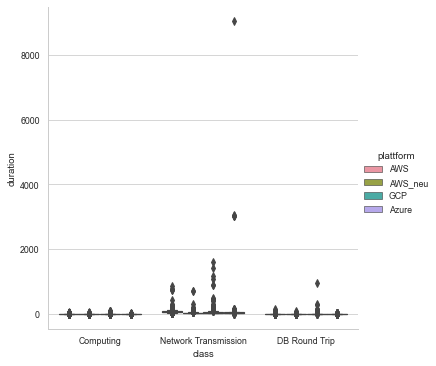

In [21]:
plot = sns.catplot(x = "class", y = "duration", hue="plattform", kind="box", data=df_calls)

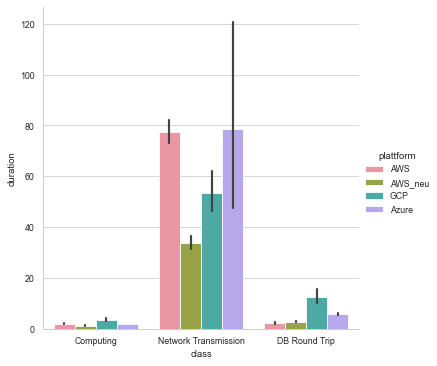

In [22]:
plot = sns.catplot(x = "class", y = "duration", hue="plattform", kind="bar", data=df_calls)

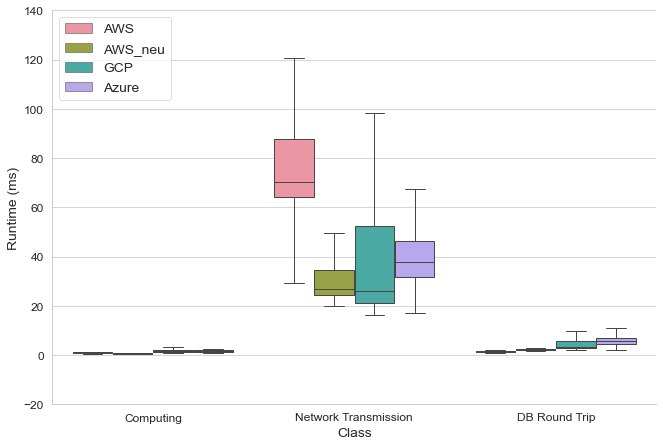

In [23]:
plot = sns.catplot(x = "class", y = "duration", hue="plattform", kind="box", sym="", data=df_calls,
                 height=6, aspect=1.5, legend=False, linewidth=1)

#plot.ax.set(yscale="log")
#plot.set(ylim=(0, None))

plot.set_xlabels(label = "Class", fontsize="x-large")
plot.set_ylabels(label = "Runtime (ms)", fontsize="x-large")
plot.set_yticklabels(size = 12)
plot.set_xticklabels(size = 12)

plot.ax.legend(loc=2, fontsize="x-large")



C:\Users\Martin\.conda\envs\BeFaaS-analysis\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


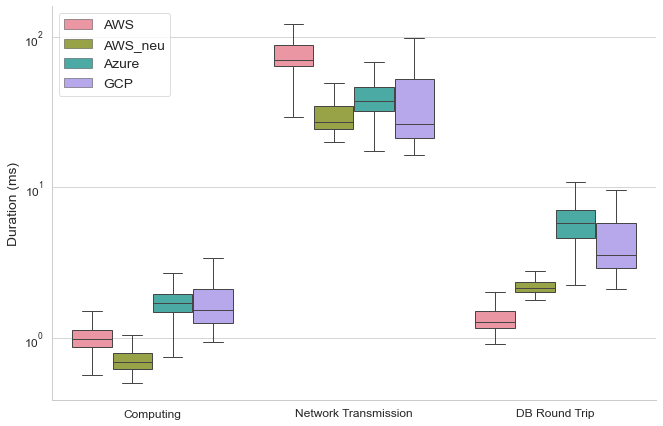

In [24]:
plot = sns.catplot(x = "class", y = "duration", hue="plattform", kind="box", sym="", data=df_calls,
                 height=6, aspect=1.5, legend=False, linewidth=1,
                 hue_order=["AWS","AWS_neu","Azure","GCP"])

plot.set_xlabels(label = "", fontsize="x-large")
plot.set_ylabels(label = "Duration (ms)", fontsize="x-large")
plot.set_yticklabels(size = 12)
plot.set_xticklabels(size = 12)

#adjust_box_widths(plot, 0.9)
plot.ax.set(yscale="log")
plot.set(ylim=(0, None))
#plot.ylim(10, 40)
#plot.ax.set(ylim=(20, 140))

plot.ax.legend(loc=2, fontsize="x-large")
plot.savefig(outfile)



